# Standard Reservoir Computer
### (graphical comparison between the Lyapunov exponents of the RC and those of the true system)

In [17]:
# Import libraries
import math     as m
import numpy    as np
import matplotlib.pyplot as plt  
import pandas   as pd
import time     as time

#######################################################################
# E N V I R O N M E N T   S E T   U P
#######################################################################
#---------------------------------------------------------------------#
# To compute elapsed time
#---------------------------------------------------------------------#
start_time = time.time()

In [18]:
D = 3

#######################################################################
# R. C .  L Y A P U N O V   E X P O N E N T S   L I S T
#######################################################################
rnd_seed = 42
txt_seed = 'seed'+str(rnd_seed)
df_RC_LE = pd.read_csv('climate/df_RC200_' + txt_seed + '_LE_PAPER.csv',delimiter=";",index_col=False)

len_df_RC_LE = len(df_RC_LE)

rho_list = df_RC_LE.rho_Lorenz


In [19]:
#######################################################################
# T R U E   S Y S T E M    L Y A P U N O V   E X P O N E N T S   L I S T
#######################################################################
df_True_LE = pd.read_csv('climate/df_True_LE_x_PAPER.csv',delimiter=";",index_col=False)

len_df_True_LE = len(df_True_LE)


Text(0.5, 1.05, 'True LEs vs RC LEs (N = 200, rnd seed = 42)')

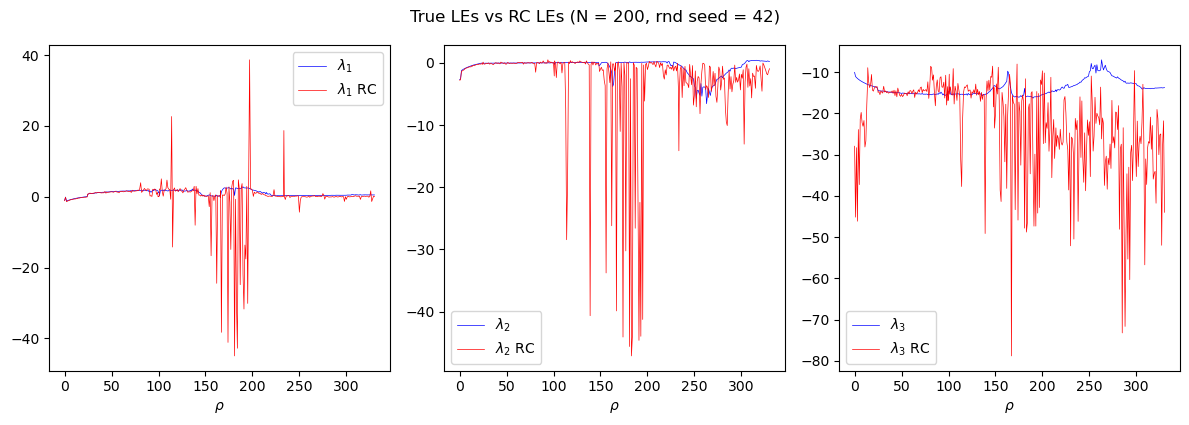

In [20]:
# Plot Lorenz variables (test and predicted dataset)
fig, axs = plt.subplots(1, 3, figsize=(12,4))  

axis_true_label = ["$\lambda_1$"     ,"$\lambda_2$"     ,"$\lambda_3$"     ]
axis_pred_label = ["$\lambda_1$ RC"     ,"$\lambda_2$ RC"     ,"$\lambda_3$ RC"     ]

for i in range(D):
    axs[i].plot(rho_list, df_True_LE.iloc[:, [i+1]] , label= axis_true_label[i], color='blue', lw = 0.5)
    axs[i].plot(rho_list, df_RC_LE.iloc[:, [i+1]] , label= axis_pred_label[i], color='red' , lw = 0.5)
    # Shrink current axis by 20%
    box = axs[i].get_position()
    #
    axs[i].set_xlabel("$\\rho$") #\\rho need to prevent parsing error!!!
    axs[i].legend()#(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
fig.suptitle('True LEs vs RC LEs (N = 200, rnd seed = ' + str(rnd_seed) + ')',y=1.05)



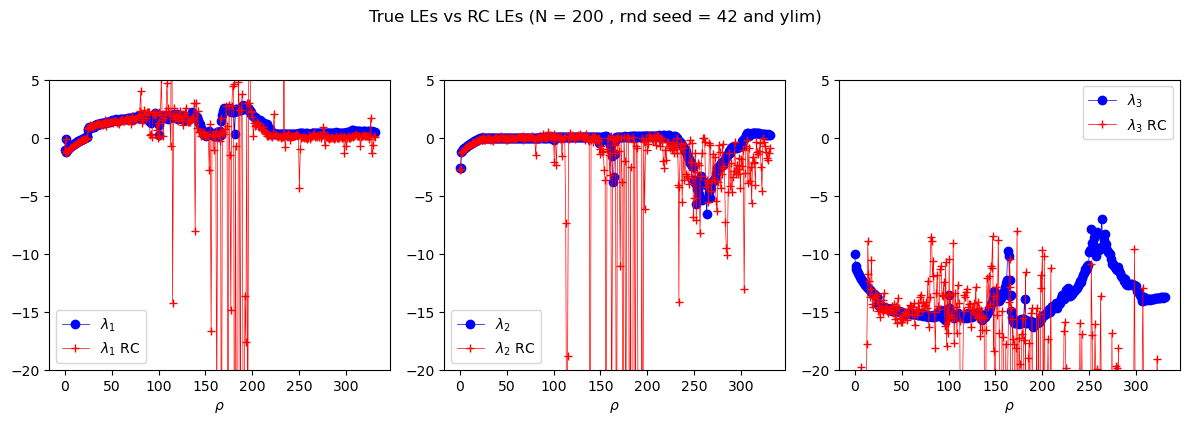

In [21]:
# Plot Lorenz variables (test and predicted dataset)
fig, axs = plt.subplots(1, 3, figsize=(12,4))  

axis_true_label = ["$\lambda_1$"     ,"$\lambda_2$"     ,"$\lambda_3$"     ]
axis_pred_label = ["$\lambda_1$ RC"     ,"$\lambda_2$ RC"     ,"$\lambda_3$ RC"     ]

for i in range(D):
    axs[i].plot(rho_list, df_True_LE.iloc[:, [i+1]] , label= axis_true_label[i], color='blue',marker='o', lw = 0.5)
    axs[i].plot(rho_list, df_RC_LE.iloc[:, [i+1]] , label= axis_pred_label[i], color='red' ,marker='+', lw = 0.5)
    axs[i].set_ylim(-20, 5)
    # Shrink current axis by 20%
    box = axs[i].get_position()
    #
    axs[i].set_xlabel("$\\rho$") #\\rho need to prevent parsing error!!!
    axs[i].legend()#(loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle('True LEs vs RC LEs (N = 200 , rnd seed = ' + str(rnd_seed) + ' and ylim)',y=1.05)
fig.tight_layout()

plt.show()


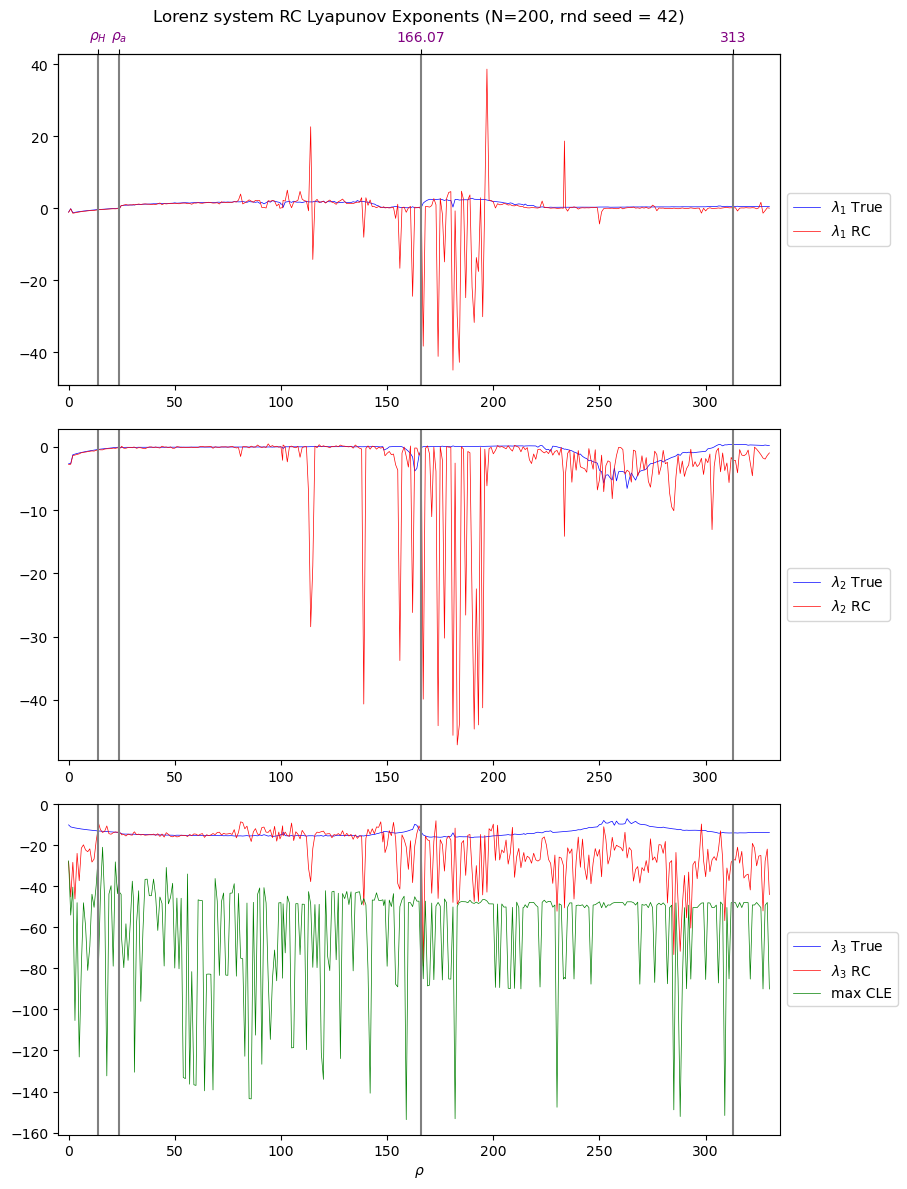

In [22]:
# Plot Lorenz system Lyapunov Exponents
fig, axs = plt.subplots(3, 1, figsize=(8, 12))  

axis_test_label_t = ["$\lambda_1$ True","$\lambda_2$ True","$\lambda_3$ True"]
axis_test_label   = ["$\lambda_1$ RC"  ,"$\lambda_2$ RC"  ,"$\lambda_3$ RC"  ]
axs[0].set_title("Lorenz system RC Lyapunov Exponents (N=200, rnd seed = " + str(rnd_seed) + ")")

for i in range(D):
    axs[i].plot(rho_list, df_True_LE.iloc[:, [i+1]] , label= axis_test_label_t[i], color='blue' , lw = 0.5)
    axs[i].plot(rho_list, df_RC_LE.iloc[:, [i+1]] , label= axis_test_label[i], color='red' , lw = 0.5)
    if i==2:
        axs[i].plot(rho_list, df_RC_LE.iloc[:, [i+2]] , label= "max CLE", color='green' , lw = 0.5)

    #
    # Shrink current axis by 20%
    box = axs[i].get_position()
    axs[i].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    axs[i].axvline(x = 13.926667, color = 'grey')
    axs[i].axvline(x = 23.9     , color = 'grey')
    #axs[i].axvline(x = 24.058   , color = 'grey')
    #axs[i].axvline(x = 470./19. , color = 'grey')
    #axs[i].axvline(x = 30.485   , color = 'grey')
    
    #axs[i].axvline(x = 99.524   , color = 'grey')
    #axs[i].axvline(x = 100.795  , color = 'grey')
    #axs[i].axvline(x = 148.4    , color = 'grey')
    axs[i].axvline(x = 166.07   , color = 'grey')
    #axs[i].axvline(x = 214.364  , color = 'grey')
    #axs[i].axvline(x = 233.5    , color = 'grey')
    axs[i].axvline(x = 313      , color = 'grey')
    #axs[i].axvline(x = 75, color = 'grey')
    axs[i].set_xlim(-5, 335)

    if i==0:
        ax2 = axs[i].twiny()
        ax2.set_xlim(-5, 335)
        ax2.set_xticks([13.926667,23.9,166.07, 313])
        #ax2.set_xticklabels(['$\\rho_H$','$\\rho_a =23.9$','166.07','313'],color='purple',fontsize=8,ha='left')
        ax2.set_xticklabels(['$\\rho_H$','$\\rho_a$','166.07','313'],color='purple')
    
    
axs[2].set_xlabel("$\\rho$") #\\rho need to prevent parsing error!!!
fig.tight_layout()

plt.savefig('climate/'+ txt_seed + '_LE_N200.png',bbox_inches='tight')

plt.show()

plt.close(fig)

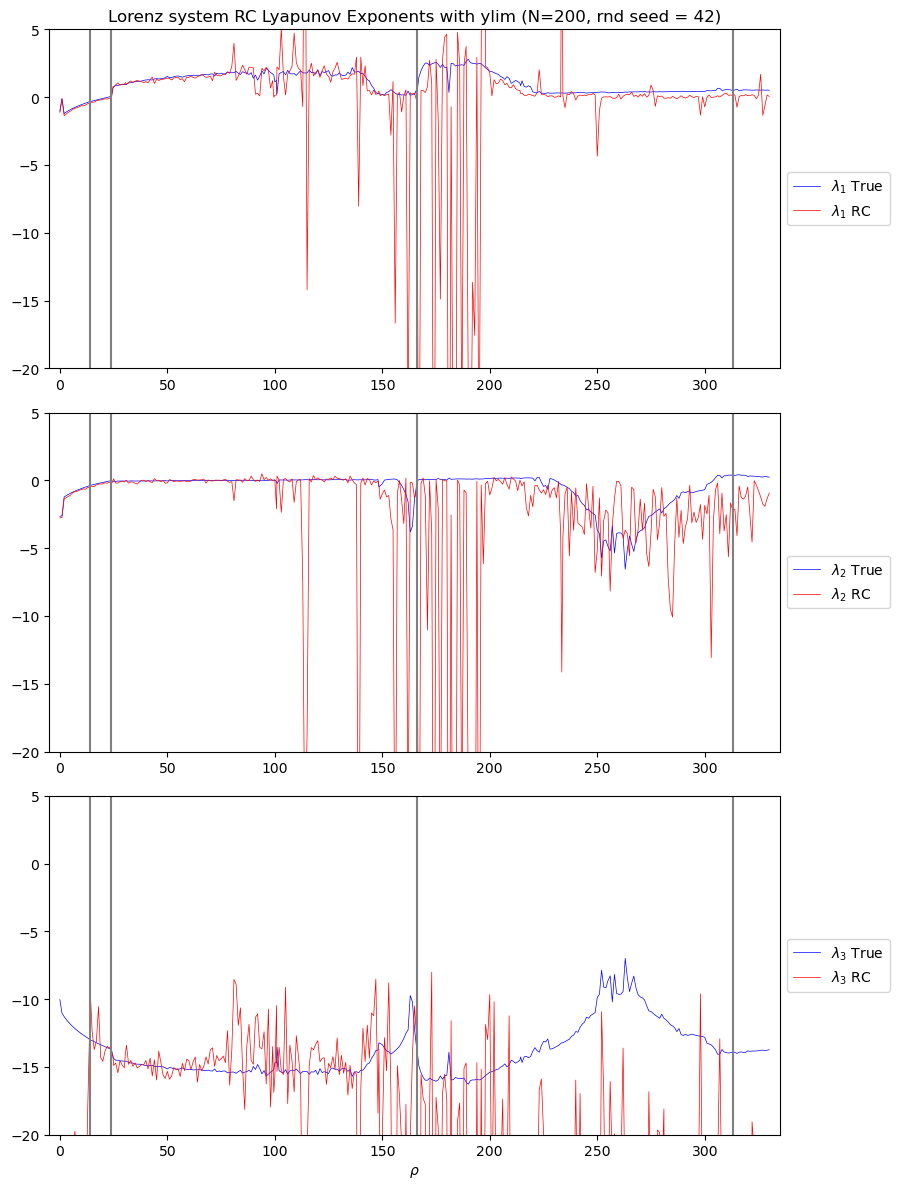

In [23]:
# Plot Lorenz system Lyapunov Exponents
fig, axs = plt.subplots(3, 1, figsize=(8, 12))  

axis_test_label_t = ["$\lambda_1$ True","$\lambda_2$ True","$\lambda_3$ True"]
axis_test_label   = ["$\lambda_1$ RC"  ,"$\lambda_2$ RC"  ,"$\lambda_3$ RC"  ]
axs[0].set_title("Lorenz system RC Lyapunov Exponents with ylim (N=200, rnd seed = " + str(rnd_seed) +")")

for i in range(D):
    axs[i].plot(rho_list, df_True_LE.iloc[:, [i+1]] , label= axis_test_label_t[i], color='blue' , lw = 0.5)
    axs[i].plot(rho_list, df_RC_LE.iloc[:, [i+1]] , label= axis_test_label[i], color='red' , lw = 0.5)
    axs[i].set_ylim(-20, 5)
    #
    # Shrink current axis by 20%
    box = axs[i].get_position()
    axs[i].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    axs[i].axvline(x = 13.926667, color = 'grey')
    axs[i].axvline(x = 23.926667, color = 'grey')
    #axs[i].axvline(x = 24.058   , color = 'grey')
    #axs[i].axvline(x = 470./19. , color = 'grey')
    #axs[i].axvline(x = 30.485   , color = 'grey')
    
    #axs[i].axvline(x = 99.524   , color = 'grey')
    #axs[i].axvline(x = 100.795  , color = 'grey')
    #axs[i].axvline(x = 148.4    , color = 'grey')
    axs[i].axvline(x = 166.07   , color = 'grey')
    #axs[i].axvline(x = 214.364  , color = 'grey')
    #axs[i].axvline(x = 233.5    , color = 'grey')
    axs[i].axvline(x = 313      , color = 'grey')
    axs[i].set_xlim(-5, 335)
    
axs[2].set_xlabel("$\\rho$") #\\rho need to prevent parsing error!!!
fig.tight_layout()

plt.show()

In [24]:
#---------------------------------------------------------------------#---------------------------------------------------------------------#
# Elapsed time
#---------------------------------------------------------------------#
print(f'\nElapsed time {time.time() - start_time:6.2e} s')


Elapsed time 3.45e+00 s
